In [ ]:
#Developer career Evolution and Changing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [91]:
data20 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2020/survey_results_public.csv')
schema20 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2020/survey_results_schema.csv')
data19 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2019/survey_results_public.csv')
schema19 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2019/survey_results_schema.csv')
data18 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2018/survey_results_public.csv', low_memory = False)
schema18 =pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2018/survey_results_schema.csv')
data17 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2017/survey_results_public.csv')
schema17 = pd.read_csv('~/Documents/StackOverflow - Project 1/developer_survey_2017/survey_results_schema.csv')
data16 = pd.read_csv('~/Documents/StackOverflow - Project 1/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
data15 = pd.read_csv('~/Documents/StackOverflow - Project 1/2015 Stack Overflow Developer Survey Responses.csv', low_memory = False)
data14 = pd.read_csv('~/Documents/StackOverflow - Project 1/2014 Stack Overflow Survey Responses.csv',low_memory = False)
data13 = pd.read_csv("~/Documents/StackOverflow - Project 1/2013 Stack Overflow Survey Responses.csv", low_memory = False)


In [3]:
data12 = pd.read_csv('~/Documents/StackOverflow - Project 1/2012 Stack Overflow Survey Results.csv',encoding="ISO-8859-1")
data11 = pd.read_csv('~/Documents/StackOverflow - Project 1/2011 Stack Overflow Survey Results.csv',encoding='ISO-8859-1', low_memory = False)

In [237]:
#Searching for the necessary columns to answer my questions
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 65)
pd.options.display.max_colwidth = 500 #increasing the number of characters to be read in a row



In [99]:
#How early are people starting to learn how to code along the time?
# startAge2020serie = data20['Age1stCode'] 
# startAge2019serie = data19['Age1stCode'] 
# startAge2020values = startAge2020serie.value_counts()
# (startAge2020values/data20.shape[0]).plot(kind="bar");
#plt.title("When did the people star start to code?");
#newData2020Age = data20['Age1stCode'].dropna()
#I realized that this is not a good question

In [5]:
# Is it necessary to have a formal degree to get a developer job (like computer science university degree)
schema20.iloc[29,1]

'How important is a formal education, such as a university degree in computer science, to your career?'

In [62]:
# Is it necessary to have a formal degree to get a developer job (like computer science university degree)
#How many of them work like a devoloper or code sometimes AND think it is important to have a formal degree such computer science degree?
#And among them, how many did undergraduate in computer science?

formal_degree = data20[['MainBranch','UndergradMajor','Employment','NEWEdImpt']].dropna(subset=['MainBranch','Employment','NEWEdImpt'])
#'I am a developer by profession'
#'I used to be a developer by profession, but no longer am'
#'I am not primarily a developer, but I write code sometimes as part of my work'
formal_degree.shape


(48140, 4)

In [65]:
data20['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [68]:
#Dropping rows in wich the value of column 'MainBranch' is "hobby" 
formal_degree_and_professional = formal_degree[(formal_degree.MainBranch != 'I am a student who is learning to code') &
                     (formal_degree.MainBranch != 'I code primarily as a hobby')]
#Dropping rows in wich the value of column 'Employment' is "Not emploeyd" and 'Student'
formal_degree_and_professional = formal_degree[(formal_degree.Employment != 'Student') &
                     (formal_degree.Employment != 'Not employed, and not looking for work') & (formal_degree.Employment != 'Not employed, but looking for work')]
formal_degree_and_professional.shape


(46710, 4)

In [70]:
#professional or someone who codes X number of each category of importance
y = formal_degree_and_professional['NEWEdImpt'].value_counts()/formal_degree.shape[0]*100



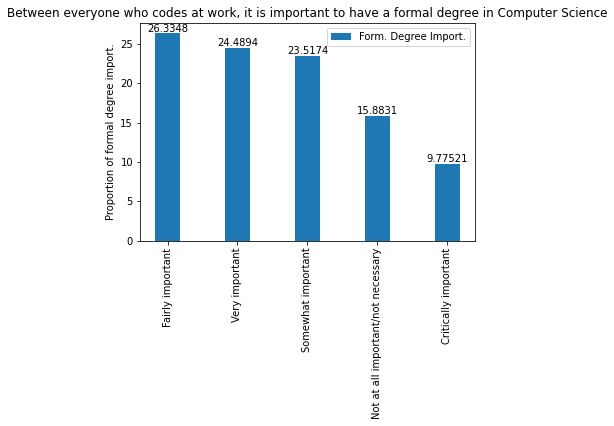

In [71]:
#professional or someone who codes X number of each category of importance

y = formal_degree_and_professional['NEWEdImpt'].value_counts()/formal_degree_and_professional.shape[0]*100
values_y = y.values.tolist()
index_y = y.index.tolist()
x = np.arange(len(index_y)) #the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, values_y, width, label='Form. Degree Import.')
ax.set_ylabel('Proportion of formal degree import.')
ax.set_title('Between everyone who codes at work, it is important to have a formal degree in Computer Science')
ax.set_xticks(x)
ax.set_xticklabels(index_y, rotation=90)
ax.legend()
ax.bar_label(rects1, padding=0)

plt.show()

In [72]:
#Dropping rows in wich the value of column 'UndergradMajor' is different of Computer Science
formal_degree_and_compSci = formal_degree[(formal_degree.UndergradMajor == "Computer science, computer engineering, or software engineering")]

In [73]:
formal_degree_and_compSci.shape 


(27497, 4)

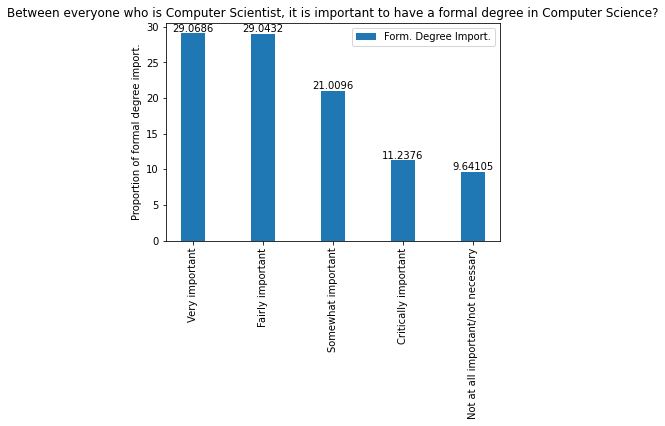

In [74]:
#professional and Computer Scientist X number of each category of importance

y1 = formal_degree_and_compSci['NEWEdImpt'].value_counts()/formal_degree_and_compSci.shape[0]*100
values_y1 = y1.values.tolist()
index_y1 = y1.index.tolist()
x1 = np.arange(len(index_y1)) #the label locations
width1 = 0.35  # the width of the bars
fig1, ax1 = plt.subplots()
rects2 = ax1.bar(x1, values_y1, width1, label='Form. Degree Import.')
ax1.set_ylabel('Proportion of formal degree import.')
ax1.set_title('Between everyone who is Computer Scientist, it is important to have a formal degree in Computer Science?')
ax1.set_xticks(x1)
ax1.set_xticklabels(index_y1, rotation=90)
ax1.legend()
ax1.bar_label(rects2, padding=0)

plt.show()

In [75]:
#Dropping rows in wich the value of column 'UndergradMajor' is Computer Science including NaN
formal_degree_and_not_compSci = formal_degree[(formal_degree.UndergradMajor != "Computer science, computer engineering, or software engineering")]
formal_degree_and_not_compSci.shape 

(20643, 4)

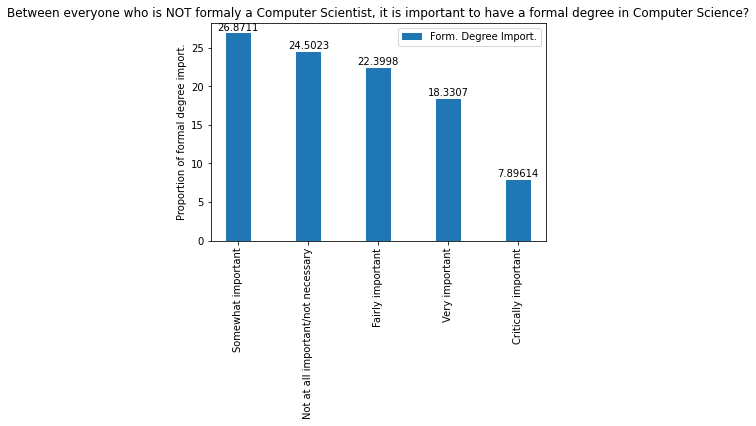

In [76]:
#professional and not a Computer Scientist X number of each category of importance

y2 = formal_degree_and_not_compSci['NEWEdImpt'].value_counts()/formal_degree_and_not_compSci.shape[0]*100
values_y2 = y2.values.tolist()
index_y2 = y2.index.tolist()
x2 = np.arange(len(index_y2)) #the label locations
width2 = 0.35  # the width of the bars
fig2, ax2 = plt.subplots()
rects3 = ax2.bar(x2, values_y2, width2, label='Form. Degree Import.')
ax2.set_ylabel('Proportion of formal degree import.')
ax2.set_title('Between everyone who is NOT formaly a Computer Scientist, it is important to have a formal degree in Computer Science?')
ax2.set_xticks(x2)
ax2.set_xticklabels(index_y2, rotation=90)
ax2.legend()
ax2.bar_label(rects3, padding=1)

plt.show()

In [103]:
#How is this happening along the time (number of non-formal degrees in computation employees/time)?



In [78]:
#Getting the number of non computer science professionals who works/worked with code
dev_not_compSci_20 = formal_degree[(formal_degree.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (formal_degree.UndergradMajor != 'Web development or web design') & 
                                  (formal_degree.UndergradMajor != 'Information systems, information technology, or system administration')]

not_dev_degree_professionals20 = dev_not_compSci_20.shape[0]
ratio_non_compSci20 = not_dev_degree_professionals20/formal_degree.shape[0]*100
ratio_non_compSci20

32.44495222268384

In [81]:
#Getting statistics of dev or coder professionals profile from 2019 dataset 
professionals19 = data19[['MainBranch','UndergradMajor', 'Employment']].dropna(subset = ['MainBranch','Employment'])
#Filtering the rows from whose values are different from coder people employed or retired
filt_professionals19 = professionals19[(professionals19.MainBranch != 'I am a student who is learning to code') &
                     (professionals19.MainBranch != 'I code primarily as a hobby')]
filt_professionals19 = filt_professionals19[(filt_professionals19.Employment != 'Not employed, and not looking for work') 
                                           & (filt_professionals19.Employment != 'Not employed, and looking for work')
                                           & (filt_professionals19.Employment != 'Student')]
#Filtering from people who have a computer science degree or some other related field
dev_not_compSci_19 = filt_professionals19[(filt_professionals19.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (filt_professionals19.UndergradMajor != 'Web development or web design') & 
                                  (filt_professionals19.UndergradMajor != 'Information systems, information technology, or system administration')]
#Ratio between the number of non computer scientists who works coding and the total
ratio_non_compSci19 = dev_not_compSci_19.shape[0]/filt_professionals19.shape[0]*100
ratio_non_compSci19



32.094179308108984

In [188]:
#Getting statistics of dev or coder professionals profile from 2018 dataset 
#Goal: get the number of professionals who codes and is no from computer sci X total employed or retired
professionals18 = data18[['UndergradMajor', 'Employment','DevType']].dropna(subset = ['Employment','DevType'])

#Filtering who is not employed
professionals18 = professionals18[(professionals18.Employment != 'Not employed, and not looking for work')
                                 & (professionals18.Employment != 'Not employed, but looking for work') ]


In [189]:
#Filtering who I believe does not work in the market coding
professionals18 = professionals18[('C-suite executive (CEO, CTO, etc.)' != professionals18.DevType) & 
('Student' != professionals18.DevType)& 
('Designer' != professionals18.DevType)&
('Marketing or sales professional' != professionals18.DevType)&
('Educator or academic researcher'!= professionals18.DevType)]

In [ ]:
#Checking which not dev professions are contained in DevType in 2018 dataset
np.set_printoptions(threshold=np.inf)
not_dev_professions = []
for profession in professionals18['DevType'].unique():
    if 'developer' not in profession:
        if profession not in not_dev_professions:
            print(profession, '/')
            not_dev_professions.append(profession)
        
            
            
    

In [218]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
ratio_non_compSci18 = professionals18[(professionals18.UndergradMajor != 'Computer science, computer engineering, or software engineering')
                & (professionals18.UndergradMajor != 'Information systems, information technology, or system administration')
                & (professionals18.UndergradMajor != 'Web development or web design')]

In [219]:
#2018 ratio between professionals who had a computation degree and general
ratio_non_compSci18.shape[0]/professionals18.shape[0]*100

32.80123583934088

In [211]:
professionals17 = data17[['Professional', 'EmploymentStatus', 'MajorUndergrad']].dropna(subset=['Professional','EmploymentStatus'])
professionals17 = professionals17[(professionals17.Professional != 'Student')
                                 & (professionals17.Professional != 'None of these')]

In [214]:
professionals17['EmploymentStatus'].unique()
professionals17 = professionals17[(professionals17.EmploymentStatus != 'Not employed, but looking for work')
                                 & (professionals17.EmploymentStatus != 'Not employed, and not looking for work')
                                 & (professionals17.EmploymentStatus != 'I prefer not to say')]

In [228]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
ratio_non_compSci17 = professionals17[(professionals17.MajorUndergrad != 'Computer science or software engineering')
                & (professionals17.MajorUndergrad != 'Computer engineering or electrical/electronics engineering')
                & (professionals17.MajorUndergrad != 'Computer programming or Web development')
                & (professionals17.MajorUndergrad != 'Information technology, networking, or system administration')]                   

In [232]:
ratio_non_compSci17.shape[0]/professionals17.shape[0]*100

32.06261600078148

In [238]:
schema20

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [247]:
not_comp = data20[(data20.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                  (data20.UndergradMajor != 'Web development or web design') & 
                  (data20.UndergradMajor != 'Information systems, information technology, or system administration') & 
                  (data20.MainBranch != 'I am a student who is learning to code') &
                  (data20.MainBranch != 'I code primarily as a hobby') &
                  (data20.Employment != 'Not employed, and not looking for work') &
                  (data20.Employment != 'Not employed, and looking for work') &
                  (data20.Employment != 'Student')]
not_comp
#edLevel

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Designer;Developer, front-end;Developer, mobile","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Employed full-time,White or of European descent,Man,"Diversity of the company or organization;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture",Slightly satisfied,I am not interested in new job opportunities,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,NaN,NaN,Github;Slack,Confluence;Github;Slack;Trello,Not sure,NaN,Fairly important,NaN,NaN,Once a year,No,No,No,Never,Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics),Play games;Visit Stack Overflow;Watch help / tutorial videos;Do other work and come back later,Windows,NaN,Android,Android;Docker;WordPress,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per week,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely used or impactful my work output would be;Opportunities for professional development,Very satisfied,"I’m not actively looking, but I am open to new opportunities",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Pandas;TensorFlow,Pandas,Github;Microsoft Teams,Github;Microsoft Teams,No,Neutral,Fairly important,Curious about other opportunities;Better compensation;Looking to relocate,"Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company",Every few months,Yes,Onboarding? What onboarding?,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics),Visit Stack Overflow,Windows,2 to 9 employees,Android;Linux;Raspberry Pi;Windows,Android;Linux;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,EUR,NaN,NaN,"Designer;Developer, front-end",Some college/university study without earning a degree,Employed full-time,White or of European descent,Man,Remote work options;Office environment or company culture;Family friendlines